<a href="https://colab.research.google.com/github/TanuRajput110/Airbnb-EDA-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## Founded in August of 2008 and based in San Francisco, California, **Airbnb** is an online marketplace that connects people who want to rent out their homes with people looking for accomodations in that local.  It currently covers more than 100,000 cities and 220 countries worldwide. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.


##> ***NYC*** is the most populous city in the US, and one of the most popular tourism and business places globally!.

## **Firstly, we will mount the drive and download the dataset.**

In [1]:
# Mount the google drive in google colab. 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####Now, Let's begin our data analysis by loading the Python packages/libraries.

In [2]:
# Import the main libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Defining the path in which the dataset is present. To do so, we have to use pd.read_csv() function which imports the CSV file into DataFrame.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


##Getting/Viewing the information of the dataset. 

In [4]:
# We can get the information of dataset by using "df.info()" function. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

####--> We get to see the different types of data variables, its datatypes present in the data set. We can also get the overview of null values roughly.

#### --> Also it shows the size of the dataset we are working with. There are **16 columns**(mix of categorical and numeric data) and **48895 rows**.####--> We get to see the different types of data variables, its datatypes present in the data set. We can also get the overview of null values roughly.

#### --> Also it shows the size of the dataset we are working with. There are **16 columns**(mix of categorical and numeric data) and **48895 rows**.

# Using **.describe()** function to see some statistical information of the data

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000




```
# This is formatted as code
```

# **Cleaning the Data**

## In .info() cell we can see the nullvalues, but we want the exact number of null values present in each column. 
## So, ".isnull().sum()" function will show us the total number of nulls(NaN) in each column of dataset.

In [6]:
#looking forward to find out first that which columns have null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Here we can see that,we have 2 columns which have more than 10000 null values.
Having so many null values is not appropriate for  exploring data or to analyse of any form. So, we have to clean the data. We observe that null values are present in irrelevant columns so we directly clean the data by dropping certain columns that is not needed for analysis i.e. 'name' ,'Host_name', 'last_reviews','latitude','longitude'....

# Dropping the irrelevant columns.

In [7]:
#drop unwanted columns...
df.drop(['host_name','name','latitude','longitude','last_review'], axis = 1,inplace = True)
df

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,2,9
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,2,36
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,6,2


### Replacing all null values in "reviews_per_month" column with zero



In [8]:
# replacing all null values in review_per_month with 0
df.fillna({'reviews_per_month':0,}, inplace=True)

# Verifying the changes
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Detecting **Outliers** in the numerical dataset.

In [9]:
# lets observe normally the outliers or extreme values in statistical description
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Here, all columns except "id" and "host id" have a big difference between 

*   List item
*   List item

the third quartile value and the max value. 

##  checking outliers of numerical columns using seaborn boxplot
columns = [ 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

# ###--> We can clearly tell that,columns, viz., price, minimum_nights, calculated_host_listings_count has outliers or extreme values.

###--> And, for availability_365 there is no single outlier in the column.

# **Handling Data..**
##We can handle the data by removing outliers or setting proper limit!.

## (a) Removing outliers for "Price" column
For removing Outliers ,we are using Quantile method which is effective!

In [10]:
high_limit = df['price'].quantile(0.99986)
print(high_limit)
low_limit = df['price'].quantile(0.0015)
print(low_limit)
new_df = df[(df['price'] < high_limit) & (df['price'] > low_limit)]
new_df


8077.419999997801
20.0


,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,0.00,2,9
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,0.00,2,36
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,0.00,6,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



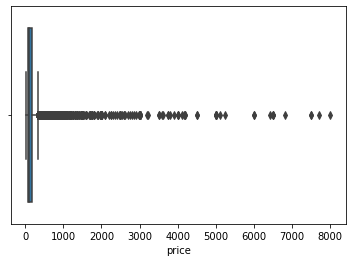

In [11]:
sns.boxplot(new_df['price'])
plt.show()

## (b) Removing Outliers for "minimum_nights" column

For removing Outliers ,we are using Quantile method which is effective!

In [12]:
high_min_limit = new_df['minimum_nights'].quantile(0.9999)
print(high_min_limit)
low_min_limit = new_df['minimum_nights'].quantile(0.0)
print(low_min_limit)
new_df1 = new_df[new_df['minimum_nights'] < high_min_limit] 
new_df1

559.8799999976764
1.0


,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,0.00,2,9
48891,36485057,6570630,Brooklyn,Bushwick,Private room,40,4,0,0.00,2,36
48892,36485431,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,0.00,6,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



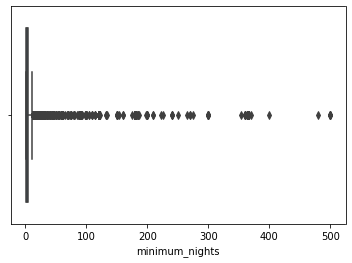

In [13]:
sns.boxplot(new_df1['minimum_nights'])
plt.show()

##After  **cleaning data** we have **48796 rows and 11 columns**

1.   List item
2.   List item



In [14]:
new_df1.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.879600e+04,4.879600e+04,48796.000000,48796.000000,48796.000000,48796.00000,48796.000000,48796.000000
mean,1.901030e+07,6.759004e+07,151.583962,6.914358,23.292299,1.09126,7.153414,112.770514
std,1.098481e+07,7.860692e+07,210.721457,17.518470,44.575849,1.59697,32.985052,131.614779
min,2.539000e+03,2.438000e+03,21.000000,1.000000,0.000000,0.00000,1.000000,0.000000
25%,9.464114e+06,7.812758e+06,69.000000,1.000000,1.000000,0.04000,1.000000,0.000000
50%,1.967108e+07,3.073912e+07,107.000000,3.000000,5.000000,0.37000,1.000000,45.000000
75%,2.914930e+07,1.074344e+08,175.000000,5.000000,24.000000,1.58000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,8000.000000,500.000000,629.000000,58.50000,327.000000,365.000000


# Now, lets **explore**, **analyze** and **vizualize** the **cleaned** **dataset** and  get some insights out of it... 